### Update 1.5 10.27.22
1. Added Joblib model save and testing

### Update 1.4 10.11.22
1. Compatibility check with Anaconda Docker image continuumio/anaconda3 2022.9
2. Compatibility check with Jupyter Stacks Docker image jupyter/scipy 2022.10
3. Fixed data formatting '190506 Jaffe Enzymatic Test Set Public.csv': added index column
4. Consolidate library initiation

### Update 1.3 02.13.22
1. Compatibility check with Linux Debian anaconda3 updates

### Update 1.2 04.26.21
1. Compatibility check with Linux Debian anaconda3 updates

### Update 1.1 05.06.19
1. Compatibility check with Linux Debian anaconda3 updates

In [1]:
#import libraries
#in case dependencies are not satisfied:
#first download requirement.txt
#then run command below to install required libraries in your prefered virtual environment
#pip install -r requirements.txt
#
#to add your venv as a jupyter kernel, run the following command below
#python -m ipykernel install --user --name=(your venv name)

#1 pandas 1.4.2
import pandas as pd

#2 seaborn 0.11.2
import seaborn as sns

#3 statsmodels 0.13.2
import statsmodels.formula.api as smf

#4 sci-kit learn 1.0.2
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

#5 xgboost 1.6.2
#xgboost library not installed in anaconda3 and jupyter/scipy stack by default
#remove pound sign ("#") from pip command below to automate installation of xgboost library to your present environment
#%pip install xgboost
from xgboost import XGBRegressor

#6 numpy 1.21.5
import numpy as np

#7 scipy 1.7.3
from scipy import stats

#8 matplotlib 3.6.1
#python magic command to render figures inside notebook
%matplotlib inline

#9 pickle 0.7.5
import pickle, requests, json

#10 warnings
import warnings

print("Initialized all libraries.")

Initialized all libraries.


In [2]:
#export dependencies
#%pip freeze > requirements.txt

In [3]:
#suppress excessive warnings log
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Format training data

In [4]:
#read data, print first 5 rows
data = pd.read_csv('190504 Jaffe Enzymatic 210426 Public.csv', index_col=0)
data.head()

,Date,Jaffe,Enzymatic
#,,,
1,03/20/19,80,58
2,03/20/19,137,130
3,03/20/19,98,84
4,03/20/19,68,40
5,03/20/19,80,65


In [5]:
#print last 5 rows
data.tail()

,Date,Jaffe,Enzymatic
#,,,
247,03/27/19,102,84
248,03/27/19,104,84
249,03/27/19,136,114
250,03/27/19,119,95
251,03/27/19,78,66


In [6]:
#print (rows, columns)
data.shape

(251, 3)

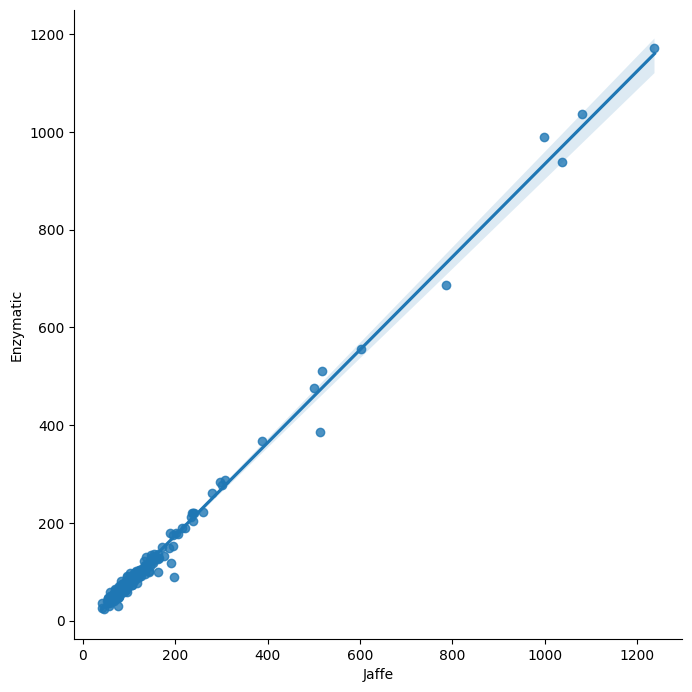

In [7]:
#visualize
sns.pairplot(data, x_vars=['Jaffe'], y_vars=['Enzymatic'], height=7, aspect=1, kind='reg')

In [8]:
#load x variables
x = data['Jaffe']
x.head()

#
1     80
2    137
3     98
4     68
5     80
Name: Jaffe, dtype: int64

In [9]:
#load y variables
y = data['Enzymatic']
y.head()

#
1     58
2    130
3     84
4     40
5     65
Name: Enzymatic, dtype: int64

In [10]:
#Reshape X
x = x.values.reshape(-1, 1)

In [11]:
#split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
print('Dataset split into training and testing sets.')

Dataset split into training and testing sets.


In [12]:
#print out training and testing shapes
print(type(x_train))
print(x_train.shape)
print(type(x_test))
print(x_test.shape)
print(type(y_train))
print(y_train.shape)
print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(188, 1)
<class 'numpy.ndarray'>
(63, 1)
<class 'pandas.core.series.Series'>
(188,)
<class 'pandas.core.series.Series'>
(63,)


# Training data set paired t-test

In [13]:
#use scipy library stats module
df_train = pd.read_csv('190504 Jaffe Enzymatic 210426 Public.csv', index_col=0)

df_train[['Jaffe','Enzymatic']].describe()

stats.ttest_rel(df_train['Jaffe'], df_train['Enzymatic'])

Ttest_relResult(statistic=24.630606395032594, pvalue=8.275041052730956e-69)

# Model training

In [14]:
#instantiate
linreg = LinearRegression()

#train linear regression model
linreg.fit(x_train, y_train)

LinearRegression()

In [15]:
#print metrics
print(linreg.intercept_)
print(linreg.coef_)
print(linreg.score(x_train, y_train))

-16.492025281610438
[0.95668921]
0.9940557217917207


In [16]:
y_pred = linreg.predict(x_test)
print(r2_score(y_test,y_pred))

0.953912780311185


In [17]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

13.727082500538272


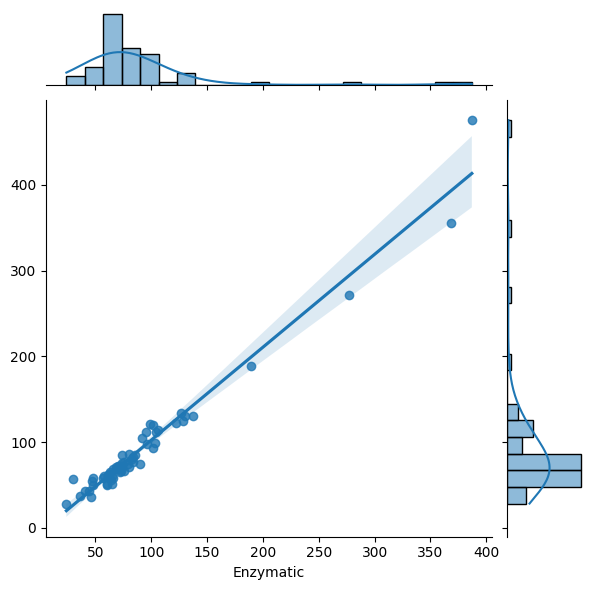

In [18]:
sns.jointplot(x=y_test,y=y_pred,kind='reg')

In [19]:
#train ridge model
ridge = linear_model.Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [20]:
#print metrics
print(ridge.intercept_)
print(ridge.coef_)
print(ridge.score(x_train, y_train))

-16.491999198628946
[0.95668902]
0.9940557217916832


In [21]:
y_pred_ridge = ridge.predict(x_test)
print(r2_score(y_test,y_pred_ridge))

0.9539128262196777


In [22]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_ridge)))

13.727075663612252


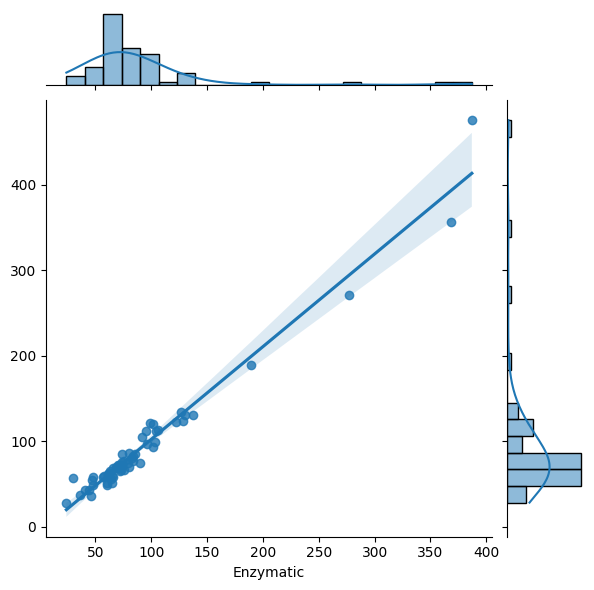

In [23]:
sns.jointplot(x=y_test,y=y_pred_ridge,kind='reg')

In [24]:
#train elastic net model
enet = linear_model.ElasticNet(random_state=0)
enet.fit(x_train,y_train)

ElasticNet(random_state=0)

In [25]:
#print metrics
print(enet.intercept_)
print(enet.coef_)
print(enet.score(x_train, y_train))

-16.487010775009367
[0.95665344]
0.9940557204021454


In [26]:
y_pred_enet = enet.predict(x_test)
print(r2_score(y_test,y_pred_enet))

0.9539216043999819


In [27]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_enet)))

13.725768309811757


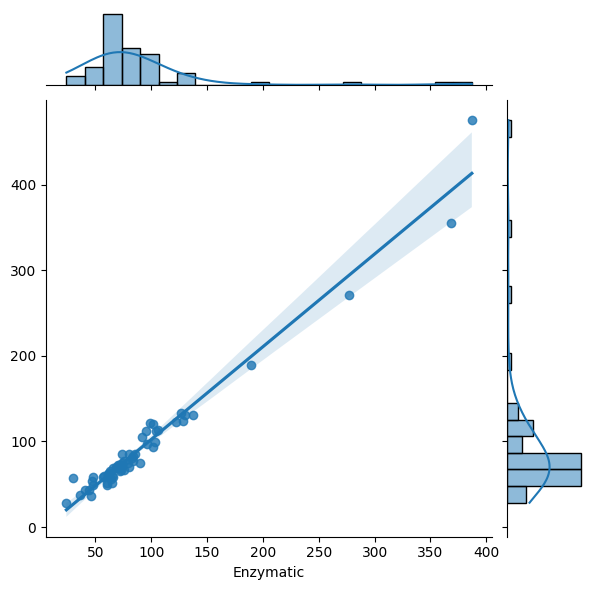

In [28]:
sns.jointplot(x=y_test,y=y_pred_enet,kind='reg')

In [29]:
#train gradient boosting regression model
gbr = GradientBoostingRegressor(random_state=0, learning_rate=0.01, n_estimators=100, max_depth=8, subsample=0.8,validation_fraction=0.2)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=8, random_state=0,
                          subsample=0.8, validation_fraction=0.2)

In [30]:
#print metrics
print(gbr.score(x_train, y_train))

0.8608589199073018


In [31]:
y_pred_gbr = gbr.predict(x_test)
print(r2_score(y_test,y_pred_gbr))

0.8106003428244869


In [32]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_gbr)))

27.827717350633755


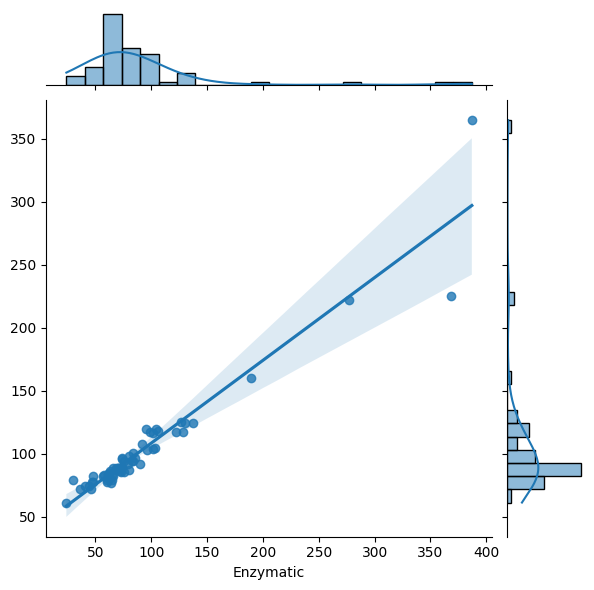

In [33]:
sns.jointplot(x=y_test,y=y_pred_gbr,kind='reg')

In [34]:
#train AdaBoost Regression model
abr = AdaBoostRegressor(random_state=0)
abr.fit(x_train, y_train)

AdaBoostRegressor(random_state=0)

In [35]:
#print metrics
print(abr.score(x_train, y_train))

0.9902728400676849


In [36]:
y_pred_abr = abr.predict(x_test)
print(r2_score(y_test,y_pred_abr))

0.8405818470446171


In [37]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_abr)))

25.530356295281916


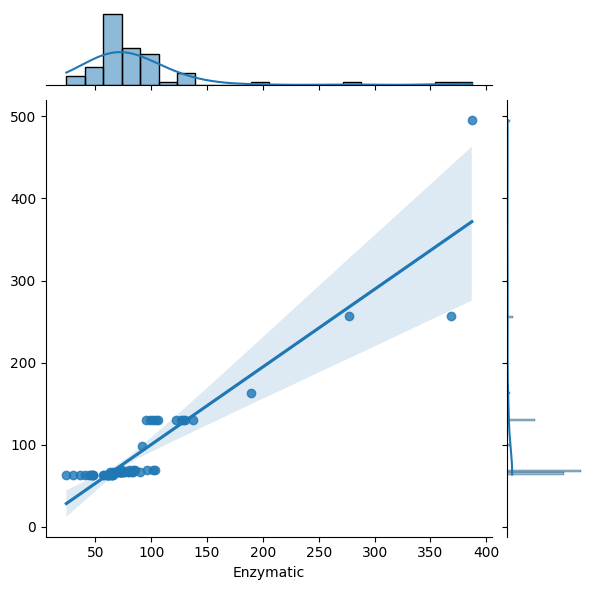

In [38]:
sns.jointplot(x=y_test,y=y_pred_abr,kind='reg')

In [39]:
#train Radom Forest Regression model
rfr = RandomForestRegressor(random_state=0)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [40]:
#print metrics
print(rfr.score(x_train, y_train))

0.9960433305969252


In [41]:
y_pred_rfr = abr.predict(x_test)
print(r2_score(y_test,y_pred_rfr))

0.8405818470446171


In [42]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_rfr)))

25.530356295281916


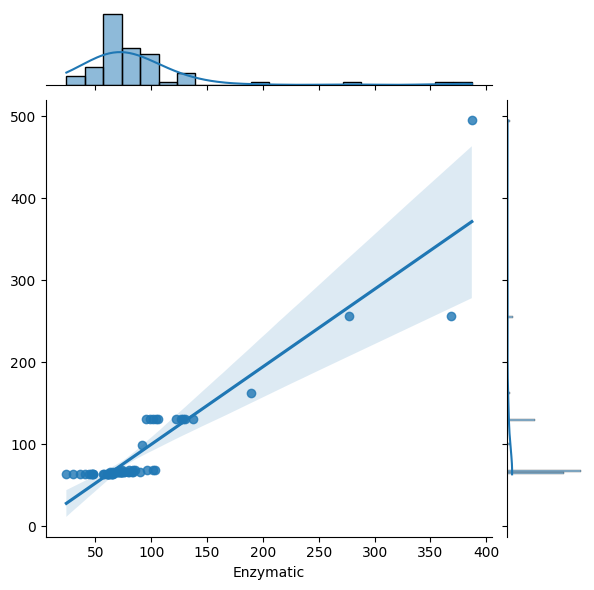

In [43]:
sns.jointplot(x=y_test,y=y_pred_rfr,kind='reg')

In [44]:
#train X gradient boost regression model
xgbr = XGBRegressor(objective = 'reg:squarederror', verbosity = 0, booster = 'gblinear', random_state=0, learning_rate=0.2, n_estimators=100, max_depth=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, reg_lambda=0, min_child_weight=0, gamma=0)
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
             max_leaves=None, min_child_weight=0, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=0, reg_lambda=0, ...)

In [45]:
#print metrics
print(xgbr.score(x_train, y_train))

0.9940556629108561


In [46]:
y_pred_xgbr = xgbr.predict(x_test)
print(r2_score(y_test,y_pred_xgbr))

0.9539504815400865


In [47]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_xgbr)))

13.721466694615827


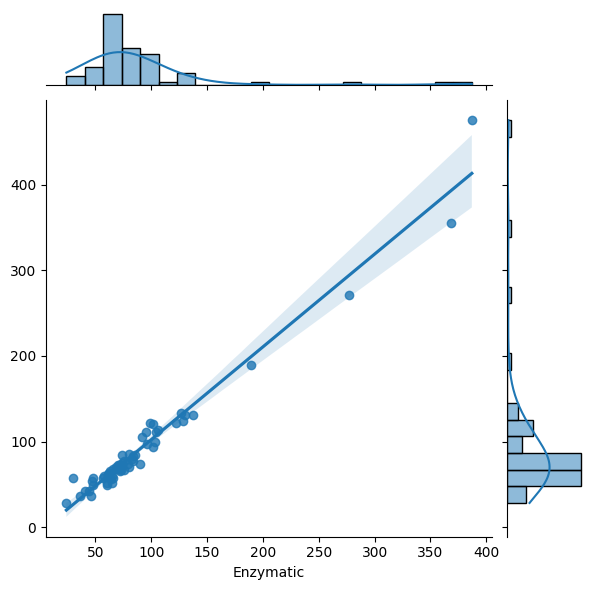

In [48]:
sns.jointplot(x=y_test,y=y_pred_xgbr,kind='reg')

# Cross-validation

In [49]:
#simple linear regression cross-validation estimators
cv_results = cross_validate(linreg, x, y, cv=10, return_estimator=True)

estimator = []

for model in cv_results['estimator']:
        estimator.insert(0,model.coef_)
        print(model.coef_)

[0.95139637]
[0.96461925]
[0.9509632]
[0.95065039]
[0.94865955]
[0.9447681]
[0.9410052]
[0.94918982]
[0.95747874]
[0.94969134]


In [50]:
#simple linear regression cross-validation scoring
scores = cross_val_score(linreg, x, y, cv=10, scoring='r2')
print(scores)

[0.9651368  0.99279638 0.8850763  0.99552947 0.99870619 0.99565728
 0.99457363 0.96245301 0.92729986 0.99268977]


In [51]:
print(scores.mean())

0.9709918688659309


In [52]:
scores = cross_val_score(linreg, x, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[ -98.70288672 -306.1975624  -168.98307252  -49.81530908  -61.29113994
 -173.12499369 -181.16477522 -351.54194042 -347.65975437  -40.24678389]


In [53]:
mse_scores = -scores
print(mse_scores)

[ 98.70288672 306.1975624  168.98307252  49.81530908  61.29113994
 173.12499369 181.16477522 351.54194042 347.65975437  40.24678389]


In [54]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 9.93493265 17.49850172 12.99934893  7.05799611  7.82886581 13.15769713
 13.45974648 18.74945174 18.64563634  6.3440353 ]


In [55]:
print(rmse_scores.mean())

12.567621219424463


In [56]:
#simple ridge regression cross-validation scoring
scores = cross_val_score(ridge, x, y, cv=10, scoring='r2')
print(scores)

[0.96513681 0.99279642 0.8850763  0.99552947 0.99870619 0.99565726
 0.9945736  0.962453   0.92729997 0.99268975]


In [57]:
print(scores.mean())

0.9709918779567304


In [58]:
scores = cross_val_score(ridge, x, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[ -98.70283636 -306.1961593  -168.983066    -49.81532175  -61.29135413
 -173.12555978 -181.16564174 -351.54206878 -347.65922369  -40.24687075]


In [59]:
mse_scores = -scores
print(mse_scores)

[ 98.70283636 306.1961593  168.983066    49.81532175  61.29135413
 173.12555978 181.16564174 351.54206878 347.65922369  40.24687075]


In [60]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 9.93493011 17.49846163 12.99934868  7.05799701  7.82887949 13.15771864
 13.45977867 18.74945516 18.64562211  6.34404215]


In [61]:
print(rmse_scores.mean())

12.56762336325063


In [62]:
#elastic net regression cross-validation scoring
scores = cross_val_score(enet, x, y, cv=10, scoring='r2')
print(scores)

[0.9651409  0.99280398 0.88507733 0.99552921 0.99870514 0.99565397
 0.99456758 0.96244983 0.92732549 0.99268611]


In [63]:
print(scores.mean())

0.9709939524009862


In [64]:
scores = cross_val_score(enet, x, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[ -98.69127197 -305.87479739 -168.98156349  -49.81826678  -61.34099627
 -173.25677138 -181.36681421 -351.57174205 -347.53717512  -40.26694337]


In [65]:
mse_scores = -scores
print(mse_scores)

[ 98.69127197 305.87479739 168.98156349  49.81826678  61.34099627
 173.25677138 181.36681421 351.57174205 347.53717512  40.26694337]


In [66]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 9.93434809 17.48927664 12.99929088  7.05820563  7.8320493  13.1627038
 13.46724969 18.75024645 18.64234897  6.34562395]


In [67]:
print(rmse_scores.mean())

12.568134342024166


In [68]:
#gradient boosting regression cross-validation scoring
scores = cross_val_score(gbr, x, y, cv=10, scoring='r2')
print(scores)

[0.85308634 0.87306006 0.70134005 0.81127972 0.79679669 0.79860546
 0.83753749 0.74345216 0.93523681 0.71744523]


In [69]:
print(scores.mean())

0.8067840007151614


In [70]:
scores = cross_val_score(gbr, x, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[ -415.93430054 -5395.71998976  -439.14768446 -2102.91887447
 -9626.27736237 -8028.70317646 -5423.97228219 -2401.98555911
  -309.70441114 -1555.61728064]


In [71]:
mse_scores = -scores
print(mse_scores)

[ 415.93430054 5395.71998976  439.14768446 2102.91887447 9626.27736237
 8028.70317646 5423.97228219 2401.98555911  309.70441114 1555.61728064]


In [72]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[20.3944674  73.45556473 20.95585084 45.85759342 98.11359418 89.60303107
 73.64762238 49.01005569 17.5984207  39.44131439]


In [73]:
print(rmse_scores.mean())

52.807751479912326


In [74]:
#extreme gradient boosting regression cross-validation scoring
scores = cross_val_score(xgbr, x, y, cv=10, scoring='r2')
print(scores)

[0.96527672 0.99286708 0.88484974 0.99553363 0.99869902 0.99562813
 0.99452013 0.96242792 0.92747798 0.99268729]


In [75]:
print(scores.mean())

0.9709967640346047


In [76]:
scores = cross_val_score(xgbr, x, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[ -98.30673355 -303.19267843 -169.31620954  -49.76898313  -61.63070484
 -174.28686178 -182.95102036 -351.77690271 -346.80793718  -40.26042258]


In [77]:
mse_scores = -scores
print(mse_scores)

[ 98.30673355 303.19267843 169.31620954  49.76898313  61.63070484
 174.28686178 182.95102036 351.77690271 346.80793718  40.26042258]


In [78]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 9.91497522 17.41242885 13.01215622  7.05471354  7.85052258 13.20177495
 13.5259388  18.75571653 18.62278006  6.34511013]


In [79]:
print(rmse_scores.mean())

12.569611688322095


# Final linear model training

In [80]:
#final linear model
final_linear_model = LinearRegression()

final_linear_model.fit(x, y)

LinearRegression()

In [81]:
print(final_linear_model.intercept_)
print(final_linear_model.coef_)
print(final_linear_model.score(x, y))

-16.103995623118294
[0.95080659]
0.9920873007992014


# Final XGBoost Regression Training

In [82]:
final_XGBmodel = XGBRegressor(objective = 'reg:squarederror', verbosity = 0, booster = 'gblinear', random_state=0, learning_rate=0.2, n_estimators=100, max_depth=1, subsample=0.8, reg_alpha=0, reg_lamba=0, gamma=0, min_child_weight=0)
final_XGBmodel.fit(x, y)

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
             max_leaves=None, min_child_weight=0, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=0, reg_lamba=0, ...)

In [83]:
#print metrics
print(final_XGBmodel.score(x, y))

0.9920871385010879


# Final test data import and formatting

In [84]:
finalTest_data = pd.read_csv('190506 Jaffe Enzymatic Test Set 210426 Public.csv', index_col=0)
finalTest_data.head()

,Date,Jaffe,Enzymatic
#,,,
1,3/28/19,112,84
2,3/28/19,103,90
3,3/28/19,52,32
4,3/28/19,96,74
5,3/28/19,48,29


In [85]:
finalTest_data.shape

(81, 3)

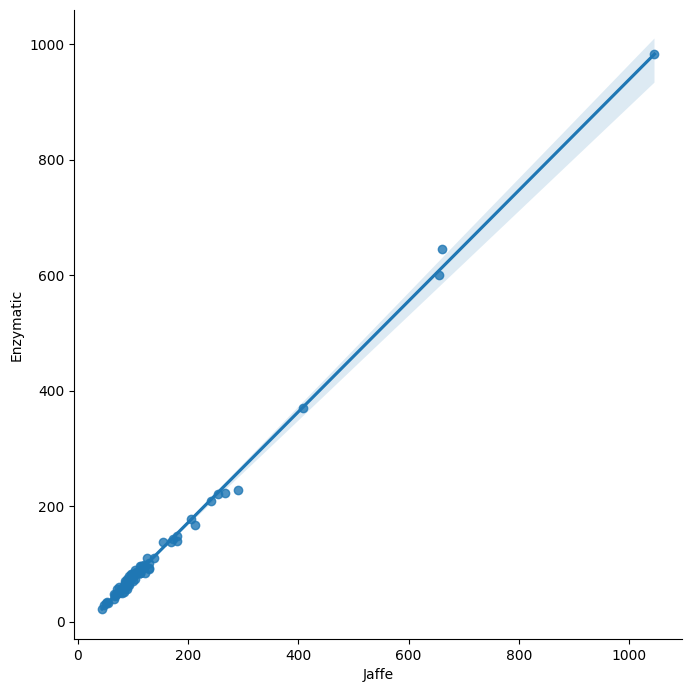

In [86]:
sns.pairplot(finalTest_data, x_vars=['Jaffe'], y_vars=['Enzymatic'], height=7, aspect=1, kind='reg')

In [87]:
finalTest_x = finalTest_data['Jaffe']
finalTest_x.head()

#
1    112
2    103
3     52
4     96
5     48
Name: Jaffe, dtype: int64

In [88]:
finalTest_y = finalTest_data['Enzymatic']
finalTest_y.head()

#
1    84
2    90
3    32
4    74
5    29
Name: Enzymatic, dtype: int64

In [89]:
finalTest_x = finalTest_x.values.reshape(-1, 1)
print('Reshaped x')

Reshaped x


In [90]:
finalTest_x.shape

(81, 1)

# Final test data set paired t-test

In [91]:
#use scipy library stats module
df_test = pd.read_csv('190506 Jaffe Enzymatic Test Set 210426 Public.csv', index_col=0)

df_test[['Jaffe','Enzymatic']].describe()

stats.ttest_rel(df_test['Jaffe'], df_test['Enzymatic'])

Ttest_relResult(statistic=23.725689593100217, pvalue=5.953618167504533e-38)

# Final model test scoring

In [92]:
finalTest_y_xgbmodel_pred = final_XGBmodel.predict(finalTest_x)
print(r2_score(finalTest_y,finalTest_y_xgbmodel_pred))

0.996506699506327


In [93]:
print(np.sqrt(metrics.mean_squared_error(finalTest_y,finalTest_y_xgbmodel_pred)))

8.190571137383346


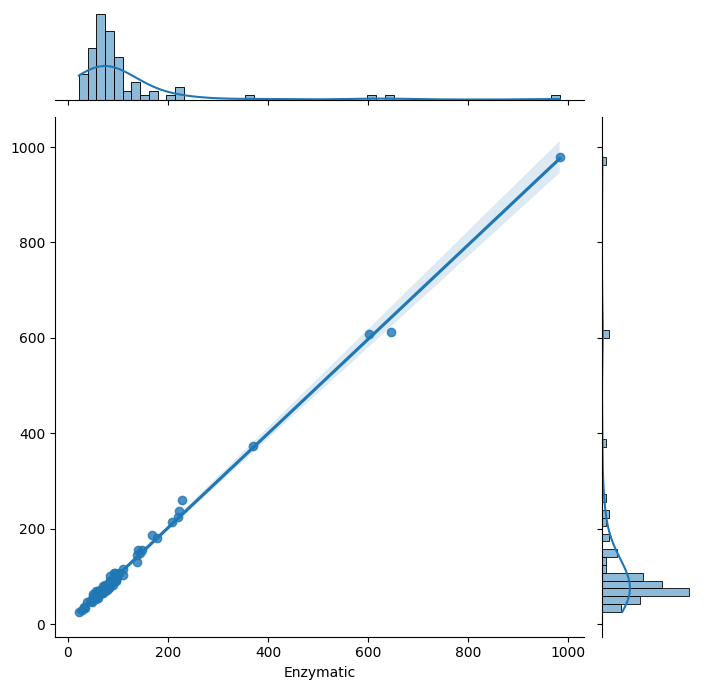

In [94]:
sns.jointplot(x=finalTest_y, y=finalTest_y_xgbmodel_pred, kind='reg', height=7)

In [95]:
finalTest_y_linearmodel_pred = final_linear_model.predict(finalTest_x)
print(r2_score(finalTest_y,finalTest_y_linearmodel_pred))

0.9965194982527801


In [96]:
print(np.sqrt(metrics.mean_squared_error(finalTest_y,finalTest_y_linearmodel_pred)))

8.175553070960817


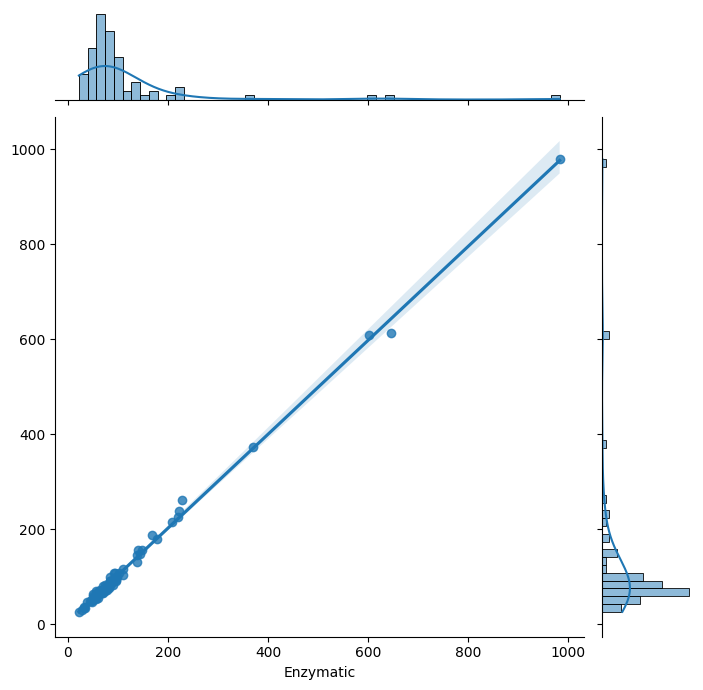

In [97]:
sns.jointplot(x=finalTest_y, y=finalTest_y_linearmodel_pred, kind='reg', height=7)

# Pickle Final Model

In [98]:
pickle.dump(final_XGBmodel, open('XGBmodel.pkl','wb'))

# Test Pickle Model

In [99]:
Pickle_Model = pickle.load(open('XGBmodel.pkl','rb'))

In [100]:
print(Pickle_Model.predict(60))

[40.994934]


# Save and Test Joblib Model

In [101]:
import joblib

joblib.dump(final_XGBmodel, "final_XGBmodel.sav")
xgb_reg = joblib.load("final_XGBmodel.sav")

preds = xgb_reg.predict(60)
print(preds[0])

40.994934
